/tmp/ipykernel_3463356/3399517936.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('viridis')


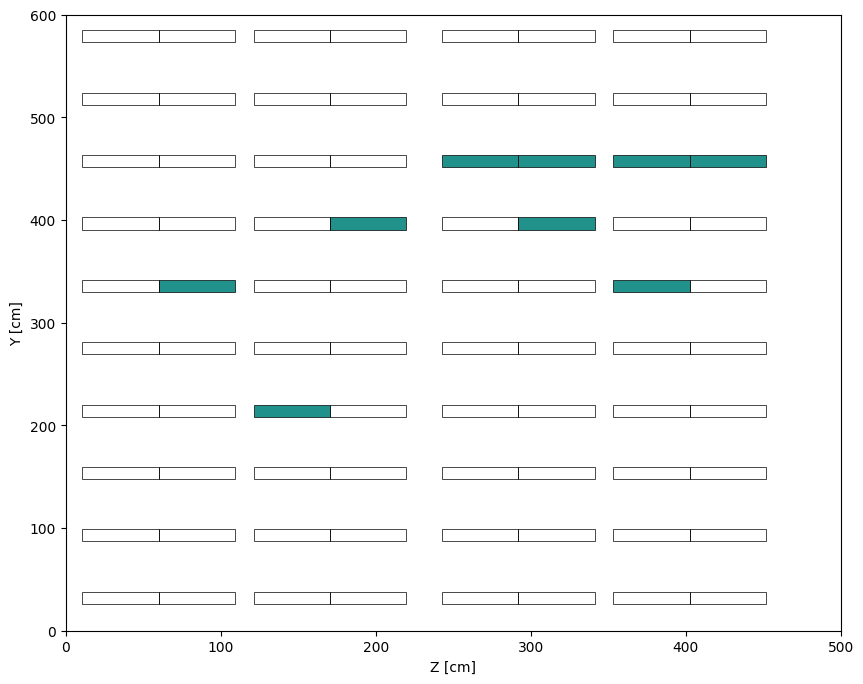

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
colormap = cm.get_cmap('viridis')
norm = mcolors.Normalize(vmin=0, vmax=1)
width = 49.2
height = 11.8

fig, ax = plt.subplots(figsize=(10,8))
i_sel = [43, 2, 12, 22, 32, 23, 14, 64, 56]
Map = np.loadtxt('PDHD_PDS_ChannelMap.csv', skiprows=1, delimiter=',')
for i, vals in enumerate(Map[Map[:,1] > 2]):
    fill = False
    weight = np.random.random()
    weight = 0.5
    color = colormap(norm(weight))
    if i in i_sel: fill = True
    rectangle = plt.Rectangle((vals[6]-width/2, vals[4]-height/2), width, height, facecolor=color, fill=fill, edgecolor='black', linewidth=0.5)
    ax.add_patch(rectangle)

ax.set_xlim(0, 500)
ax.set_ylim(0, 600)
ax.set_xlabel('Z [cm]')
ax.set_ylabel('Y [cm]')
plt.show()

In [ ]:
import uproot
f = uproot.open('pdhd_028850_LowECLMatching_test2.root')
tree = f["isolated_pds"]
pds_amplitude = tree["pds_amplitude"].array()
pds_channel = tree["pds_ch"].array()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
colormap = cm.get_cmap('viridis')
norm = mcolors.Normalize(vmin=0, vmax=1)
width = 49.2
height = 11.8

unique_vals, counts = np.unique(pds_channel, return_counts=True)
unique_vals[np.argmax(counts)]

fig, ax = plt.subplots(figsize=(10,8))
Map = np.loadtxt('PDHD_PDS_ChannelMap.csv', skiprows=1, delimiter=',')
for i, vals in enumerate(Map[Map[:,1] > 2]):
    #fill = False
    weight = np.random.random()
    color = colormap(norm(weight))
    #if i in i_sel: fill = True
    rectangle = plt.Rectangle((vals[6]-width/2, vals[4]-height/2), width, height, facecolor=color, edgecolor='black', linewidth=0.5)
    ax.add_patch(rectangle)

ax.set_xlim(0, 500)
ax.set_ylim(0, 600)
ax.set_xlabel('Z [cm]')
ax.set_ylabel('Y [cm]')
plt.show()

In [8]:
filepath = '28850_pickle/np04hd_raw_run028850_0000_dataflow0_datawriter_0_20240822T123536_isolatedPDSHits.hdf5'
with h5py.File(filepath, 'r') as f:
    hits = np.array(f['hits'])

In [20]:
hits_sel = hits[0:4000]
found_indices = []
for i in range(4000):
    #Bool = np.sum((hits_sel[i]['T']+0.1 > hits_sel['T']) & (hits_sel[i]['T']-0.1 < hits_sel['T']))
    Bool = np.sum(np.abs(hits_sel[i]['T'] - hits_sel['T']) < 0.1)
    if Bool == 2:
        found_indices.append(i)

In [22]:
len(found_indices)

390

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

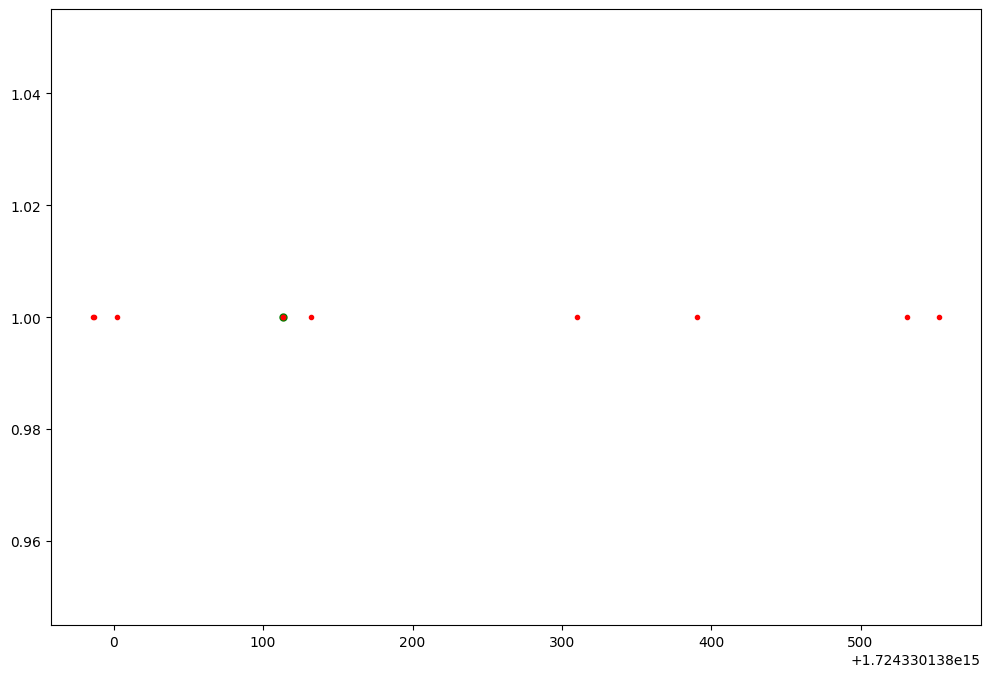

In [32]:
fig, axes = plt.subplots(figsize=(12,8))
index = 50
center_hit = hits_sel[found_indices[index]]['T']
bottom_hits = hits_sel[found_indices[index]-5:found_indices[index]]['T']
top_hits = hits_sel[found_indices[index]:found_indices[index]+5]['T']
plt.plot(center_hit, 1, 'go', markersize=5)
plt.plot(bottom_hits, np.ones(len(bottom_hits)), 'ro', markersize=3)
plt.plot(top_hits, np.ones(len(top_hits)), 'ro', markersize=3)
axes.hlines(1, xmin=min(bottom_hits['T'])-10, xmax=max(top_hits['T'])+10, color='k')

In [26]:
bottom_hits

array([], dtype=int64)